In [1]:
# We'll start by reading in the corpus, which preserves word order
import pandas as pd

data = pd.read_pickle('corpus_df.pkl')
data

,transcripts
comedian,
louis,Intro\nFade the music out. Let’s roll. Hold th...
dave,This is Dave. He tells dirty jokes for a livin...
ricky,Hello. Hello! How you doing? Great. Thank you....
bo,Bo What? Old MacDonald had a farm E I E I O An...
bill,"[cheers and applause] All right, thank you! Th..."
jim,[Car horn honks] [Audience cheering] [Announce...
john,"All right, Petunia. Wish me luck out there. Yo..."
hasan,[theme music: orchestral hip-hop] [crowd roars...
ali,"Ladies and gentlemen, please welcome to the st..."


In [2]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['transcripts'].apply(pol)
data['subjectivity'] = data['transcripts'].apply(sub)
data

,transcripts,polarity,subjectivity
comedian,,,
louis,Intro\nFade the music out. Let’s roll. Hold th...,0.056665,0.515796
dave,This is Dave. He tells dirty jokes for a livin...,-0.002690,0.513958
ricky,Hello. Hello! How you doing? Great. Thank you....,0.066489,0.497313
bo,Bo What? Old MacDonald had a farm E I E I O An...,0.074514,0.539368
bill,"[cheers and applause] All right, thank you! Th...",0.016479,0.537016
jim,[Car horn honks] [Audience cheering] [Announce...,0.044224,0.523382
john,"All right, Petunia. Wish me luck out there. Yo...",0.082355,0.484137
hasan,[theme music: orchestral hip-hop] [crowd roars...,0.086856,0.460619
ali,"Ladies and gentlemen, please welcome to the st...",0.069359,0.482403


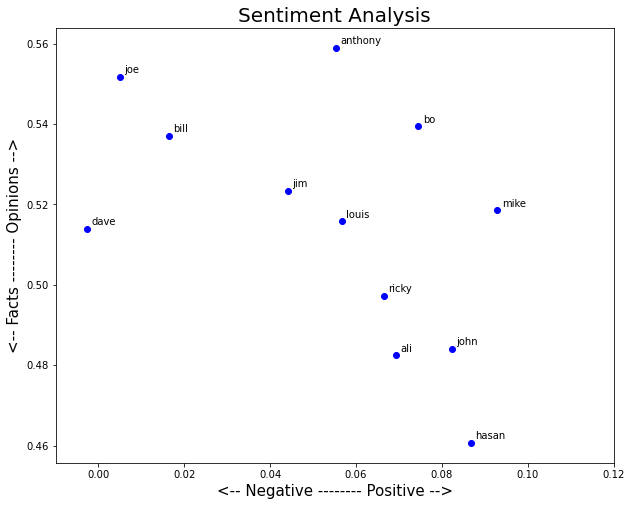

In [3]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

for ind, comedian in enumerate(data.index):
    x = data.polarity.loc[comedian]
    y = data.subjectivity.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data.index[ind], fontsize=10)
    plt.xlim(-.01, .12) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

In [4]:
# Split each routine into 10 parts
import numpy as np
import math

def split_text(text, n=10):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [5]:
# Let's create a list to hold all of the pieces of text
list_pieces = []
for t in data.transcripts:
    split = split_text(t)
    list_pieces.append(split)
    
list_pieces

[['Intro\nFade the music out. Let’s roll. Hold there. Lights. Do the lights. Thank you. Thank you very much. I appreciate that. I don’t necessarily agree with you, but I appreciate very much. Well, this is a nice place. This is easily the nicest place For many miles in every direction. That’s how you compliment a building And shit on a town with one sentence. It is odd around here, as I was driving here. There doesn’t seem to be any difference Between the sidewalk and the street for pedestrians here. People just kind of walk in the middle of the road. I love traveling And seeing all the different parts of the country. I live in New York. I live in a– There’s no value to your doing that at all. “The Old Lady And The Dog”\nI live– I live in New York. I always– Like, there’s this old lady in my neighborhood, And she’s always walking her dog. She’s always just– she’s very old. She just stands there just being old, And the dog just fights gravity every day, just– The two of them, it’s reall

In [6]:
# Calculate the polarity for each piece of text

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

[[0.0611880068716006,
  0.03561645331664863,
  0.1377777723365958,
  0.026953933747412007,
  0.05593590437340433,
  0.029630690660102422,
  0.08344959077380953,
  0.14363832165641377,
  0.022845309452452306,
  -0.01568181818181818],
 [-0.05093449586407334,
  -0.05557354333778966,
  0.035829891691960644,
  0.08313791054959534,
  -0.026718682968682954,
  0.09785205955660498,
  -0.12774488467261902,
  -0.0858667847304211,
  -0.06019759281122916,
  0.15191938178780284],
 [0.17428735102346216,
  0.15246819899189015,
  0.05809832528582529,
  -0.0330954733672125,
  0.16723688497882047,
  0.013249771062271064,
  0.06146913882762937,
  0.023207239808802314,
  0.012928669410150898,
  0.06295056216931218],
 [0.17481829573934843,
  -0.04116923483102918,
  -0.022686011904761886,
  0.019912549136687042,
  0.0592493946731235,
  0.05700242218099361,
  0.04407051282051284,
  0.11019892033865757,
  0.19319944575626394,
  0.23029900332225917],
 [-0.0326152022580594,
  0.006825656825656827,
  0.0234520012

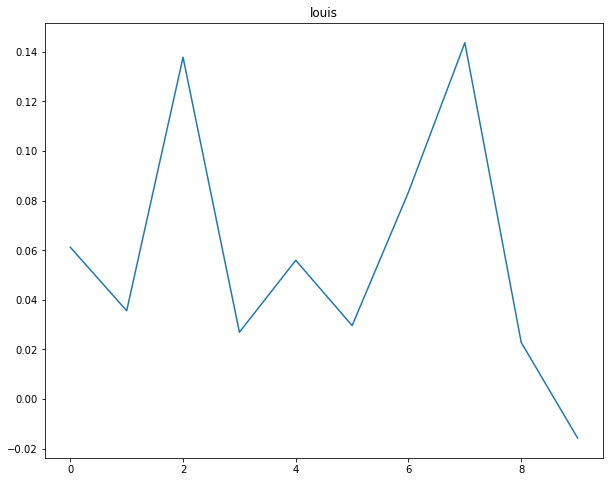

In [7]:
# Show the plot for one comedian
plt.plot(polarity_transcript[0])
plt.title(data.index[0])
plt.show()

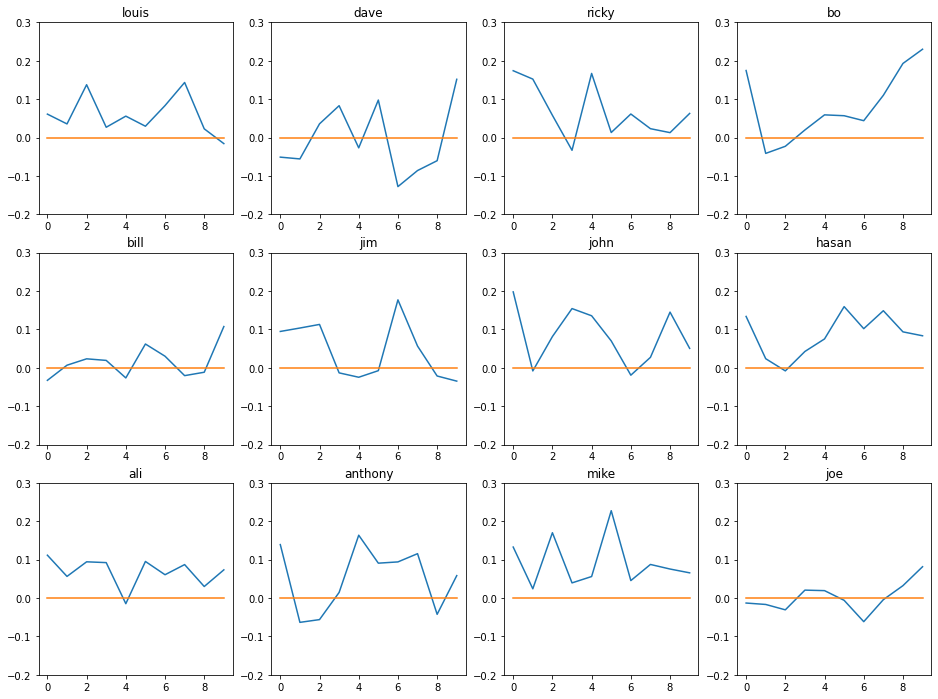

In [8]:
# Show the plot for all comedians
plt.rcParams['figure.figsize'] = [16, 12]

for ind, comedian in enumerate(data.index):    
    plt.subplot(3, 4, ind+1)
    plt.plot(polarity_transcript[ind])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data.index[ind])
    plt.ylim(ymin=-.2, ymax=.3)
    
plt.show()